# Project: Estimating the Age of the Universe from Type Ia Supernovae Observations

The project analyzes observational data from the Pantheon+SH0ES dataset of Type Ia supernovae to estimate key cosmological parameters, including the Hubble constant ($H_0$) and the age of the universe. The approach includes:

- Plotting the Hubble diagram (distance modulus vs. redshift)
- Fitting a cosmological model to determine $H_0$ and $\Omega_m$
- Estimating the age of the universe based on model parameters
- Evaluating residuals to assess the model’s accuracy
- Investigating the impact of fixing $\Omega_m$
- Comparing results across low- and high-redshift supernovae



## Environment Setup

This project relies on the following Python libraries:

- `numpy` — numerical operations  
- `pandas` — data manipulation  
- `matplotlib` — data visualization  
- `scipy` — curve fitting and integration  
- `astropy` — physical constants and unit handling  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import quad
from astropy.constants import c
from astropy import units as u

## Data Loading: Pantheon+SH0ES Sample

This analysis uses the Pantheon+SH0ES dataset, which provides calibrated observations of Type Ia supernovae across a broad redshift range. The data include redshifts corrected for various systematic effects, distance moduli, and associated uncertainties.

The dataset is space-delimited and includes comment lines (prefixed with `#`), which are ignored during loading.

For this project, I focus on the following key columns:

- `zHD`: Redshift used in the Hubble diagram  
- `MU_SH0ES`: Distance modulus calibrated using SH0ES  
- `MU_SH0ES_ERR_DIAG`: Diagonal uncertainty on the distance modulus  

The dataset file can be obtained from the [Pantheon+SH0ES Data Release](https://github.com/PantheonPlusSH0ES/DataRelease/blob/main/Pantheon%2B_Data/4_DISTANCES_AND_COVAR/Pantheon%2BSH0ES.dat).




In [3]:
# Local file path
file_path = "Pantheon+SH0ES.dat"

# Load the file
df = pd.read_csv(file_path,comment = '#', delim_whitespace=True)

# See structure
print(df.head())

             CID  IDSURVEY      zHD   zHDERR     zCMB  zCMBERR     zHEL  \
0         2011fe        51  0.00122  0.00084  0.00122  0.00002  0.00082   
1         2011fe        56  0.00122  0.00084  0.00122  0.00002  0.00082   
2         2012cg        51  0.00256  0.00084  0.00256  0.00002  0.00144   
3         2012cg        56  0.00256  0.00084  0.00256  0.00002  0.00144   
4  1994DRichmond        50  0.00299  0.00084  0.00299  0.00004  0.00187   

   zHELERR  m_b_corr  m_b_corr_err_DIAG  ...  PKMJDERR  NDOF   FITCHI2  \
0  0.00002   9.74571           1.516210  ...    0.1071    36   26.8859   
1  0.00002   9.80286           1.517230  ...    0.0579   101   88.3064   
2  0.00002  11.47030           0.781906  ...    0.0278   165  233.5000   
3  0.00002  11.49190           0.798612  ...    0.0667    55  100.1220   
4  0.00004  11.52270           0.880798  ...    0.0522   146  109.8390   

    FITPROB  m_b_corr_err_RAW  m_b_corr_err_VPEC  biasCor_m_b  biasCorErr_m_b  \
0  0.864470            

C:\Users\lenovo\AppData\Local\Temp\ipykernel_27088\2889242673.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path,comment = '#', delim_whitespace=True)


In [4]:
# All the columns in the dataset
print(df.columns)

Index(['CID', 'IDSURVEY', 'zHD', 'zHDERR', 'zCMB', 'zCMBERR', 'zHEL',
       'zHELERR', 'm_b_corr', 'm_b_corr_err_DIAG', 'MU_SH0ES',
       'MU_SH0ES_ERR_DIAG', 'CEPH_DIST', 'IS_CALIBRATOR', 'USED_IN_SH0ES_HF',
       'c', 'cERR', 'x1', 'x1ERR', 'mB', 'mBERR', 'x0', 'x0ERR', 'COV_x1_c',
       'COV_x1_x0', 'COV_c_x0', 'RA', 'DEC', 'HOST_RA', 'HOST_DEC',
       'HOST_ANGSEP', 'VPEC', 'VPECERR', 'MWEBV', 'HOST_LOGMASS',
       'HOST_LOGMASS_ERR', 'PKMJD', 'PKMJDERR', 'NDOF', 'FITCHI2', 'FITPROB',
       'm_b_corr_err_RAW', 'm_b_corr_err_VPEC', 'biasCor_m_b',
       'biasCorErr_m_b', 'biasCor_m_b_COVSCALE', 'biasCor_m_b_COVADD'],
      dtype='object')


In [5]:

redshift_data = df['zHD']                           # Redshift for the hubble diagram
distance_mod = df['MU_SH0ES']                       # mu = m - M = Apparent Brightness - Absolute Brightness, This can indicate the distance.
uncertainty = df['MU_SH0ES_ERR_DIAG']               # Uncertainty in distance modulus

print(redshift_data.head())
print(distance_mod.head())
print(uncertainty.head())


0    0.00122
1    0.00122
2    0.00256
3    0.00256
4    0.00299
Name: zHD, dtype: float64
0    28.9987
1    29.0559
2    30.7233
3    30.7449
4    30.7757
Name: MU_SH0ES, dtype: float64
0    1.516450
1    1.517470
2    0.782372
3    0.799068
4    0.881212
Name: MU_SH0ES_ERR_DIAG, dtype: float64


## Hubble Diagram Visualization

The Hubble diagram illustrates the relationship between redshift ($z$) and distance modulus ($\mu$). This fundamental plot in observational cosmology enables comparison of supernova data with theoretical predictions from cosmological models.

A logarithmic scale is applied to the redshift axis to effectively display supernovae spanning both low and high redshift regimes.



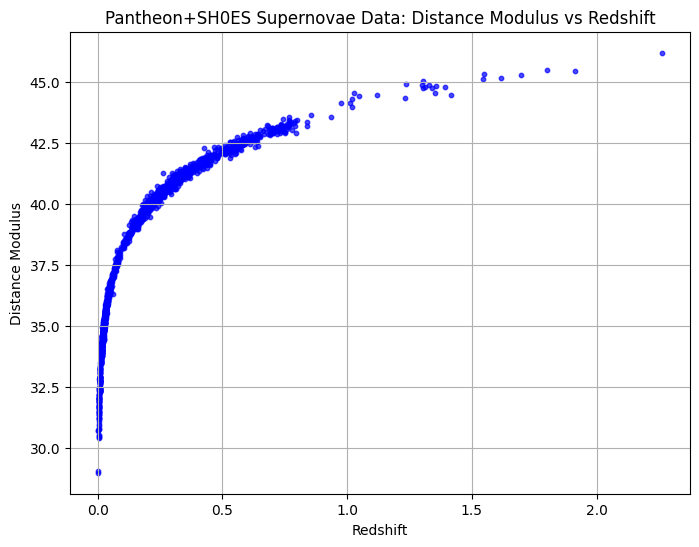

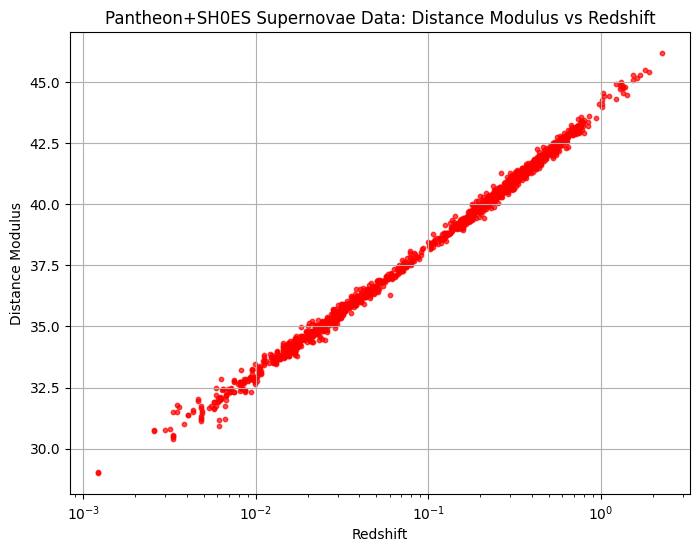

In [6]:
# Write a code to plot the distance modulus and the redshift (x-axis), label them accordingly. 


z = df['zHD']
mu = df['MU_SH0ES']

# Create the plot
plt.figure(figsize=(8,6))
plt.scatter(z, mu, s=10, color='blue', alpha=0.7)

# Label axes
plt.xlabel('Redshift')
plt.ylabel('Distance Modulus')
plt.title('Pantheon+SH0ES Supernovae Data: Distance Modulus vs Redshift')

# Show grid and plot
plt.grid(True)
plt.show()



# Using log scale in x-axis

# Create the plot
plt.figure(figsize=(8,6))
plt.scatter(z, mu, s=10, color='red', alpha=0.7)

# Label axes
plt.xlabel('Redshift')
plt.xscale('log')
plt.ylabel('Distance Modulus')
plt.title('Pantheon+SH0ES Supernovae Data: Distance Modulus vs Redshift')

# Show grid and plot
plt.grid(True)
plt.show()


## Cosmological Model Definition

The analysis adopts the flat $\Lambda\mathrm{CDM}$ cosmological model as the theoretical framework. The key components are:

- The dimensionless Hubble parameter:
  $$
  E(z) = \sqrt{\Omega_m (1+z)^3 + (1 - \Omega_m)}
  $$

- The distance modulus:
  $$
  \mu(z) = 5 \log_{10}(d_L / \text{Mpc}) + 25
  $$

- The luminosity distance:
  $$
  d_L(z) = (1 + z) \cdot \frac{c}{H_0} \int_0^z \frac{dz'}{E(z')}
  $$

These expressions enable calculation of the theoretical distance modulus for a given redshift $z$, Hubble constant $H_0$, and matter density parameter $\Omega_m$.



In [7]:
# Define the E(z) for flat LCDM

def E(z, Omega_m):
    return np.sqrt(Omega_m * (1 + z)**3 + (1 - Omega_m))

# Luminosity distance in Mpc, Using scipy quad to integrate.

def luminosity_distance(z, H0, Omega_m):
    c = 299792.458  # speed of light in km/s
    integrand = lambda x: 1.0 / E(x, Omega_m)
    integral, _ = quad(integrand, 0, z)
    return (1 + z) * (c / H0) * integral


# Theoretical distance modulus, use above function inside mu_theory to compute luminosity distance 

def mu_theory(z, H0, Omega_m):
    ret = []
    for zi in z:
        d_L = luminosity_distance(zi, H0, Omega_m)  # in Mpc
        ret.append(5 * np.log10(d_L) + 25)
    ret = np.array(ret)
    return ret




##  Model Fitting to Supernova Observations

The next step involves fitting the theoretical distance modulus model $\mu(z)$ to the observed supernova data. This fitting process aims to determine the best-fit values of the Hubble constant $H_0$ and the matter density parameter $\Omega_m$, as well as their uncertainties.

To perform this, a non-linear least squares optimization is applied using the `curve_fit` function from `scipy.optimize`. The inputs for the fitting procedure include the observed distance moduli $\mu$, their corresponding redshifts $z$, and measurement uncertainties.

For the initial parameter estimates, the values chosen are:
- $H_0 = 70\, \text{km s}^{-1} \text{Mpc}^{-1}$
- $\Omega_m = 0.3$

In [8]:
# Initial guess: H0 = 70, Omega_m = 0.3
H_guess = 70
omega_guess = 0.3


# Write a code for fitting and taking error out of the parameters
x_data = z
y_data = mu
p0 = [H_guess, omega_guess]
# sigma =  uncertainty for errors and more reliability 

popt, pcov = curve_fit(mu_theory, x_data, y_data, p0, sigma = uncertainty)

H0_fit = popt[0]
Omega_m_fit = popt[1]

H0_err = np.sqrt(pcov[0,0])        # np.sqrt for arrays
Omega_m_err = np.sqrt(pcov[1,1]) 


print(f"Fitted H0 = {H0_fit:.2f} ± {H0_err:.2f} km/s/Mpc")
print(f"Fitted Omega_m = {Omega_m_fit:.3f} ± {Omega_m_err:.3f}")


Fitted H0 = 72.97 ± 0.17 km/s/Mpc
Fitted Omega_m = 0.351 ± 0.012


C:\Users\lenovo\AppData\Local\Temp\ipykernel_27088\2543574218.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


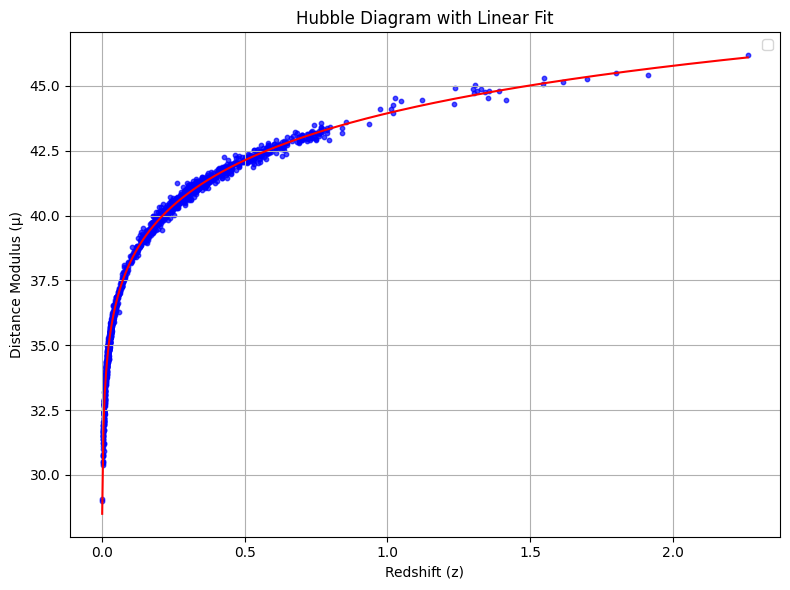

C:\Users\lenovo\AppData\Local\Temp\ipykernel_27088\2543574218.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


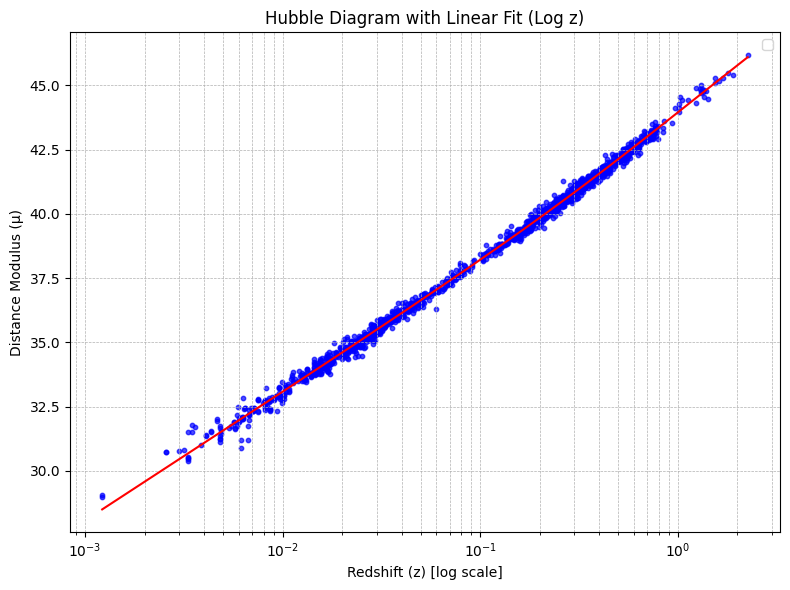

In [ ]:
# fitted model values
z_fit = np.linspace(min(z), max(z), 500)
mu_fit = mu_theory(z_fit, H0_fit, Omega_m_fit)


# Plot Hubble Diagram
plt.figure(figsize=(8, 6))
plt.scatter(z, mu, s=10, color='blue', alpha=0.7)
#plt.errorbar(z, mu, yerr=uncertainty, fmt='o', markersize=4, alpha=0.6, label='Observed Data')
plt.plot(z_fit, mu_fit, 'red')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (μ)')
plt.title('Hubble Diagram with Linear Fit')
plt.grid(True)
plt.tight_layout()
plt.show()



# Model fit values
z_fit = np.linspace(min(z[z > 0]), max(z), 500)  # Avoid log(0)
mu_fit = mu_theory(z_fit, H0_fit, Omega_m_fit)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(z, mu, s=10, color='blue', alpha=0.7)
#plt.errorbar(z, mu, yerr=uncertainty, fmt='o', markersize=4, alpha=0.6, label='Observed Data')
plt.plot(z_fit, mu_fit, 'red')
plt.xscale('log')  # Set log scale
plt.xlabel('Redshift (z) [log scale]')
plt.ylabel('Distance Modulus (μ)')
plt.title('Hubble Diagram with Linear Fit (Log z)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## Estimation of the Universe’s Age

Using the obtained fitted parameters $H_0$ and $\Omega_m$, the age of the universe $t_0$ is estimated by numerically evaluating the integral:

$$
t_0 = \frac{1}{H_0} \int_0^{z_{\text{max}}} \frac{1}{(1 + z) E(z, \Omega_m)} \, dz
$$

where $z_{\text{max}}$ is a sufficiently large upper limit chosen to approximate infinity.

The Hubble constant $H_0$ is converted to units of $\text{Gyr}^{-1}$ to ensure consistent units. This provides a check on the cosmological model by comparing the estimated age to values from other probes like Planck CMB measurements.




In [10]:
# Function for age of the universe as given above

def age_of_universe(H0, Omega_m):
    integrand = lambda z: 1.0 / ((1 + z) * E(z, Omega_m))
    integral, _ = quad(integrand, 0, 10000)  # z_max = 10000
    H0_gyr = (H0 * (u.km / u.s / u.Mpc)).to(1 / u.Gyr).value
    t0 = integral / H0_gyr 

    return t0 # in Gyr

t0 = age_of_universe(H0_fit, Omega_m_fit)
print(f"Estimated age of Universe: {t0:.2f} Gyr")


Estimated age of Universe: 12.36 Gyr


## 📊 Residual Analysis

To assess the goodness of fit of the cosmological model, we calculate the residuals defined as:

$$
\text{Residual} = \mu_{\mathrm{obs}} - \mu_{\mathrm{model}}
$$

Plotting the residuals as a function of redshift allows identification of systematic deviations, biases, or outliers. Ideally, residuals should be randomly distributed around zero with no discernible patterns, indicating an adequate model fit.



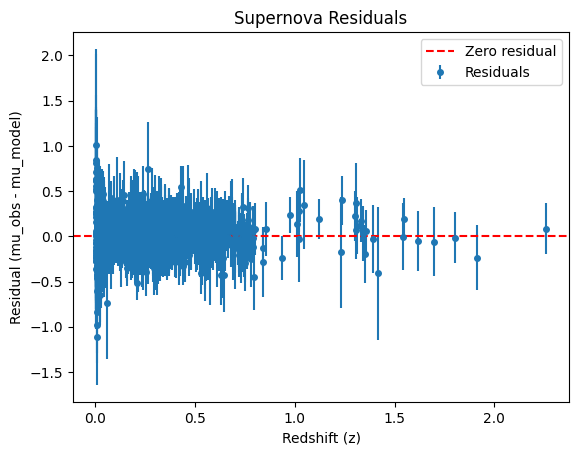

In [11]:
# Write the code to find residual by computing mu_theory and then plot
mu_model = mu_theory(z, H0_fit, Omega_m_fit)

# Residuals
residuals = mu - mu_model

# Plot Residual vs Redshift
plt.errorbar(z, residuals, yerr=uncertainty, fmt='o', markersize=4, label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero residual')
plt.xlabel('Redshift (z)')
plt.ylabel('Residual (mu_obs - mu_model)')
plt.title('Supernova Residuals')
plt.legend()
plt.show()


## Fixed Matter Density

To reduce parameter degeneracy,  $ \Omega_m = 0.3 $ is fixed and the model is fit only for the Hubble constant $ H_0 $.



In [13]:
def mu_fixed_Om(z, H0):
    return mu_theory(z, H0, Omega_m=0.3)

# Fitting with this fixed value
H_guess = 70
x_data = z
y_data = mu
p0 = [H_guess]
# sigma =  uncertainty for errors and more reliability 

popt, pcov = curve_fit(mu_fixed_Om, x_data, y_data, p0, sigma = uncertainty)

H0_fit = popt[0]


H0_err = np.sqrt(pcov[0,0])        # np.sqrt for arrays



print(f"Fitted H0 = {H0_fit:.2f} ± {H0_err:.2f} km/s/Mpc")


Fitted H0 = 73.53 ± 0.11 km/s/Mpc


## Comparison of Low-Redshift and High-Redshift Subsamples

The dataset is divided into two subsamples based on redshift:
- **Low-redshift** supernovae ($z < 0.1$)
- **High-redshift** supernovae ($z \geq 0.1$)

Separate fits are performed on each subset with the matter density parameter fixed at $\Omega_m = 0.3$. This analysis investigates possible variations or systematic differences in the inferred Hubble constant $H_0$ across redshift ranges.



In [14]:
# Split the data for the three columns 

z_split = 0.1

mask_low = x_data < z_split
mask_high = x_data >= z_split

x_low = x_data[mask_low]
y_low = y_data[mask_low]
uncertainty_low = uncertainty[mask_low]

x_high = x_data[mask_high]
y_high = y_data[mask_high]
uncertainty_high = uncertainty[mask_high]

popt_low, pcov_low = curve_fit(mu_fixed_Om, x_low, y_low, p0=[H_guess], sigma=uncertainty_low)
popt_high, pcov_high = curve_fit(mu_fixed_Om, x_high, y_high, p0=[H_guess], sigma=uncertainty_high)

H0_low = popt_low[0]
H0_high = popt_high[0]


print(f"Low-z (z < {z_split}): H₀ = {H0_low:.2f} km/s/Mpc")
print(f"High-z (z ≥ {z_split}): H₀ = {H0_high:.2f} km/s/Mpc")


Low-z (z < 0.1): H₀ = 73.01 km/s/Mpc
High-z (z ≥ 0.1): H₀ = 73.85 km/s/Mpc


## Summary and Outlook

To contextualize the fitted parameters obtained in this analysis, the fitted values are compared with the values reported in the Pantheon+ collaboration paper ([Scolnic et al., 2023](https://arxiv.org/pdf/2310.11727)).

**Published Pantheon+ Results**  
- $\Omega_m = 0.36 \pm 0.02$  
- $H_0 = 72.83 \pm 0.23 \, \mathrm{km/s/Mpc}$

**Fitted Parameters from This Analysis**  
- $\Omega_m = 0.351 \pm 0.012$  
- $H_0 = 72.97 \pm 0.17 \, \mathrm{km/s/Mpc}$

**Estimated Age of the Universe (from fitted parameters)**  
- $t_0 = 12.36 \, \mathrm{Gyr}$  
- *Planck 2018 CMB estimate:* $t_0 = 13.787 \pm 0.02 \, \mathrm{Gyr}$

Both the fitted values and uncertainties are in good agreement with those reported by the Pantheon+ collaboration. Minor deviations may result from factors such as dataset selection, numerical integration limits, or the specific fitting methodology. In future work, further analysis will explore alternative cosmological models, including non-flat geometries such as spherical (closed) and hyperbolic (open) universes. These models will be used to recompute cosmological predictions—particularly the age of the universe—and compare them with results from the flat $\Lambda\mathrm{CDM}$ model and observational benchmarks.


